- ワインのデータセット利用
- 2値分類系のアルゴリズムまとめ

In [100]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression # ロジスティック回帰

In [22]:
# データの読み込み
df = pd.read_csv("../data/winequality-red.csv", sep=";") 

In [28]:
# qualityが6未満
display(df[df['quality'] < 6])
print(df[df['quality'] < 6].shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


(744, 12)


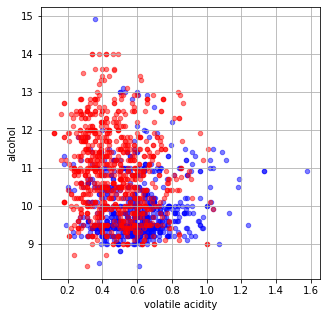

In [33]:
fig, ax = plt.subplots(1, 1)

# quality が 6 未満の行を抜き出して、x軸を volatile acidity 、 y軸を alcohol として青色の丸を散布する
df[df['quality'] <  6].plot(kind='scatter', x='volatile acidity', y='alcohol', ax=ax, 
                              c='blue', alpha=0.5)

# quality が 6 以上の行を抜き出して、x軸を volatile acidity 、 y軸を alcohol として赤色の丸を散布する
df[df['quality'] >= 6].plot(kind='scatter', x='volatile acidity', y='alcohol', ax=ax, 
                              c='red', alpha=0.5, grid=True, figsize=(5,5))
plt.show()

In [36]:
# quality が 6 未満のワインを「0」、
# 6以上のワインを「1」とした class 列を追加
df['class'] = [0 if i <= 5 else 1 for i in df['quality'].tolist()]

In [37]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


## 主成分分析(PCA)で次元圧縮して可視化

In [38]:
from sklearn.decomposition import PCA #主成分分析器

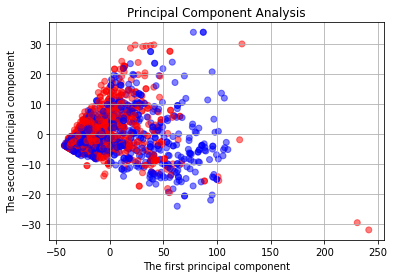

In [44]:
pca = PCA()
pca.fit(df.iloc[:, :11])

# それぞれに与える色を決める。
color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df['class'].tolist()]

# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, :11])

plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid()
plt.show()

In [45]:
# 説明変数と目的変数に分割する
X = df.iloc[:, :11] # 説明変数
y = df.iloc[:, 12] # 目的変数

In [56]:
# 訓練データ、テスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=123)

# ロジスティック回帰
- べルヌーイ分布に従う変数の統計的回帰モデル
- 発生確率を予測する

In [60]:
clf = LogisticRegression() #モデルの生成
clf.fit(X_train, y_train) #学習

C:\Users\ren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# 正解率 (train) : 学習に用いたデータをどのくらい正しく予測できるか
clf.score(X_train,y_train)

0.7591240875912408

In [62]:
# 正解率 (test) : 学習に用いなかったデータをどのくらい正しく予測できるか
clf.score(X_test,y_test)

0.7109375

In [63]:
y_predict = clf.predict(X_test)